In this Notebook we will analyse a dataset containing information about customers of a telephone company<br>
Data is <a href='https://www.kaggle.com/blastchar/telco-customer-churn'>here</a><br>
The goal is to predict if a customer will churn based on his informations. (Target feature 'Churn')

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [375]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [376]:
data.shape

(7043, 21)

In [377]:
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [378]:
42.3*44

1861.1999999999998

In [379]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [380]:
np.unique(data.TotalCharges.values)

array([' ', '100.2', '100.25', ..., '999.45', '999.8', '999.9'],
      dtype=object)

In [381]:
data=data.replace(to_replace=" ",value=np.nan) #pour que ce soit plus considéré comme un 'object'

In [382]:
data.TotalCharges=pd.to_numeric(data.TotalCharges)

In [383]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [384]:
np.unique(data.TotalCharges.values)

array([18.8 , 18.85, 18.9 , ...,   nan,   nan,   nan])

In [385]:
data.loc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [386]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [387]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [388]:
numeric_features = data.select_dtypes(include=[np.number])

In [389]:
numeric_features.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [390]:
categorical_features = data.select_dtypes(include=[np.object])

In [391]:
categorical_features.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [392]:
data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [393]:
data.kurt()

SeniorCitizen     1.362596
tenure           -1.387372
MonthlyCharges   -1.257260
TotalCharges     -0.231799
dtype: float64

In [394]:
data.groupby('gender').size()

gender
Female    3488
Male      3555
dtype: int64

In [395]:
data.groupby('Partner').size()

Partner
No     3641
Yes    3402
dtype: int64

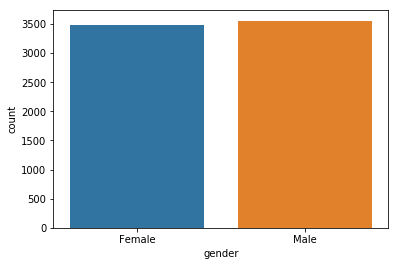

In [396]:
sns.countplot(x='gender',data=data)

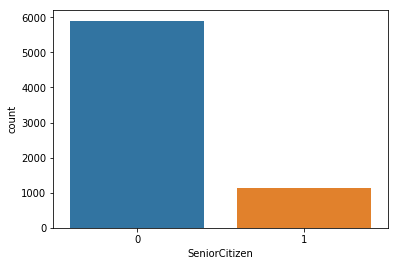

In [397]:
sns.countplot(x='SeniorCitizen',data=data)

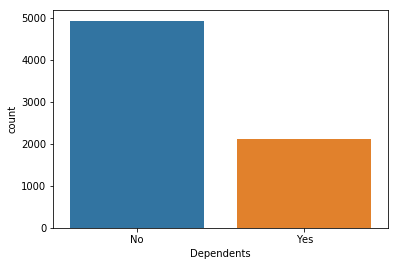

In [398]:
sns.countplot(x='Dependents',data=data)

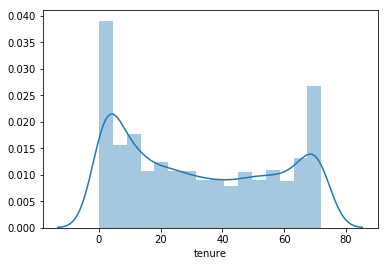

In [399]:
sns.distplot(data.tenure)

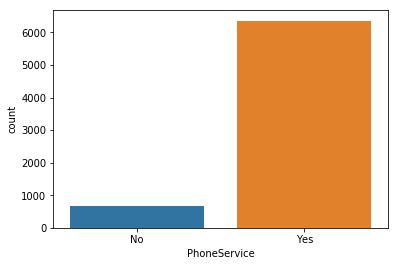

In [400]:
sns.countplot(x='PhoneService',data=data)

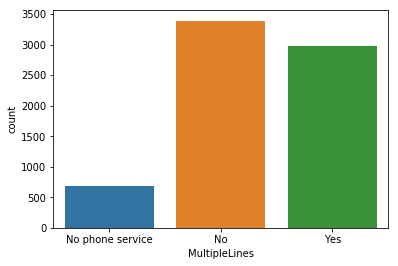

In [401]:
sns.countplot(x='MultipleLines',data=data)

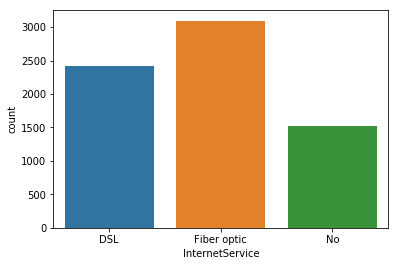

In [402]:
sns.countplot(x='InternetService',data=data)

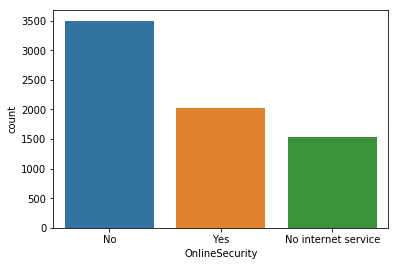

In [403]:
sns.countplot(x='OnlineSecurity',data=data)

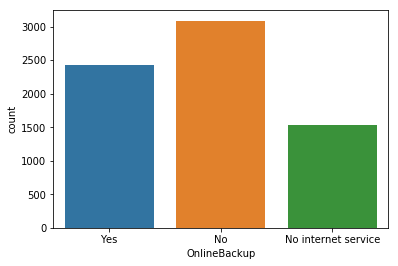

In [404]:
sns.countplot(x='OnlineBackup',data=data)

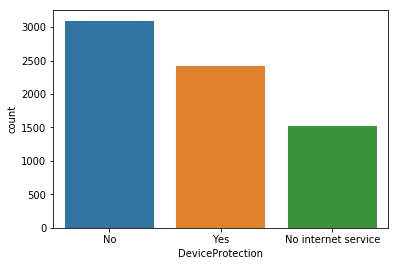

In [405]:
sns.countplot(x='DeviceProtection',data=data)

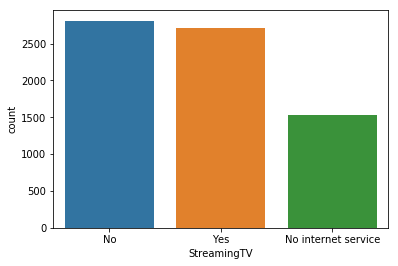

In [406]:
sns.countplot(x='StreamingTV',data=data)

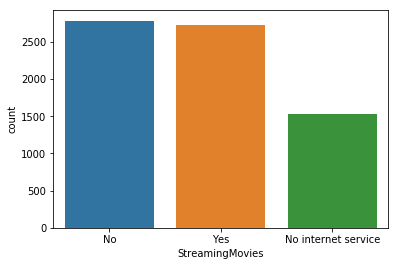

In [407]:
sns.countplot(x='StreamingMovies',data=data)

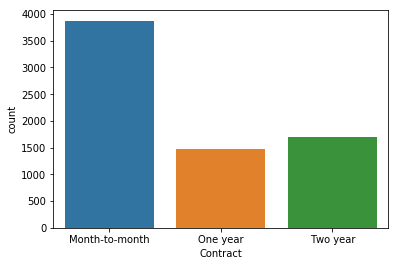

In [408]:
sns.countplot(x='Contract',data=data)

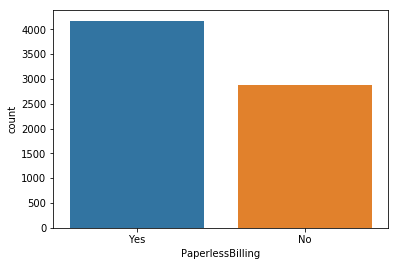

In [409]:
sns.countplot(x='PaperlessBilling',data=data)

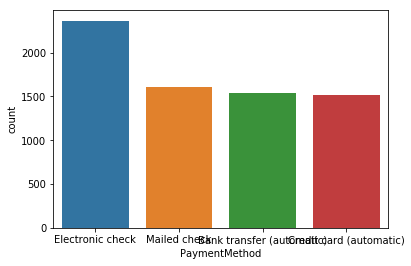

In [410]:
sns.countplot(x='PaymentMethod',data=data)

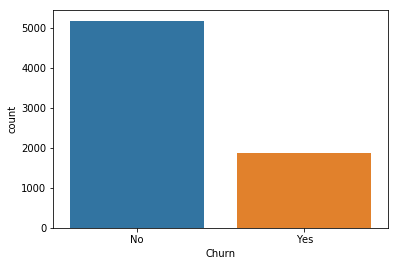

In [411]:
sns.countplot(x='Churn',data=data)

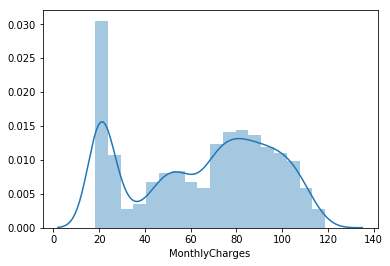

In [412]:
sns.distplot(data.MonthlyCharges)

In [413]:
data.TotalCharges.isnull().sum()

11

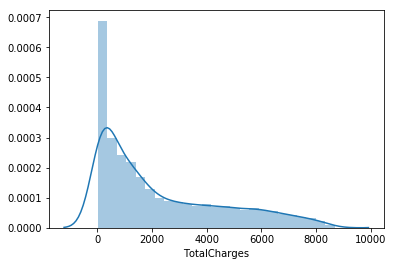

In [414]:
sns.distplot(data.dropna().TotalCharges)

In [415]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [416]:
len(categorical_features.columns)

17

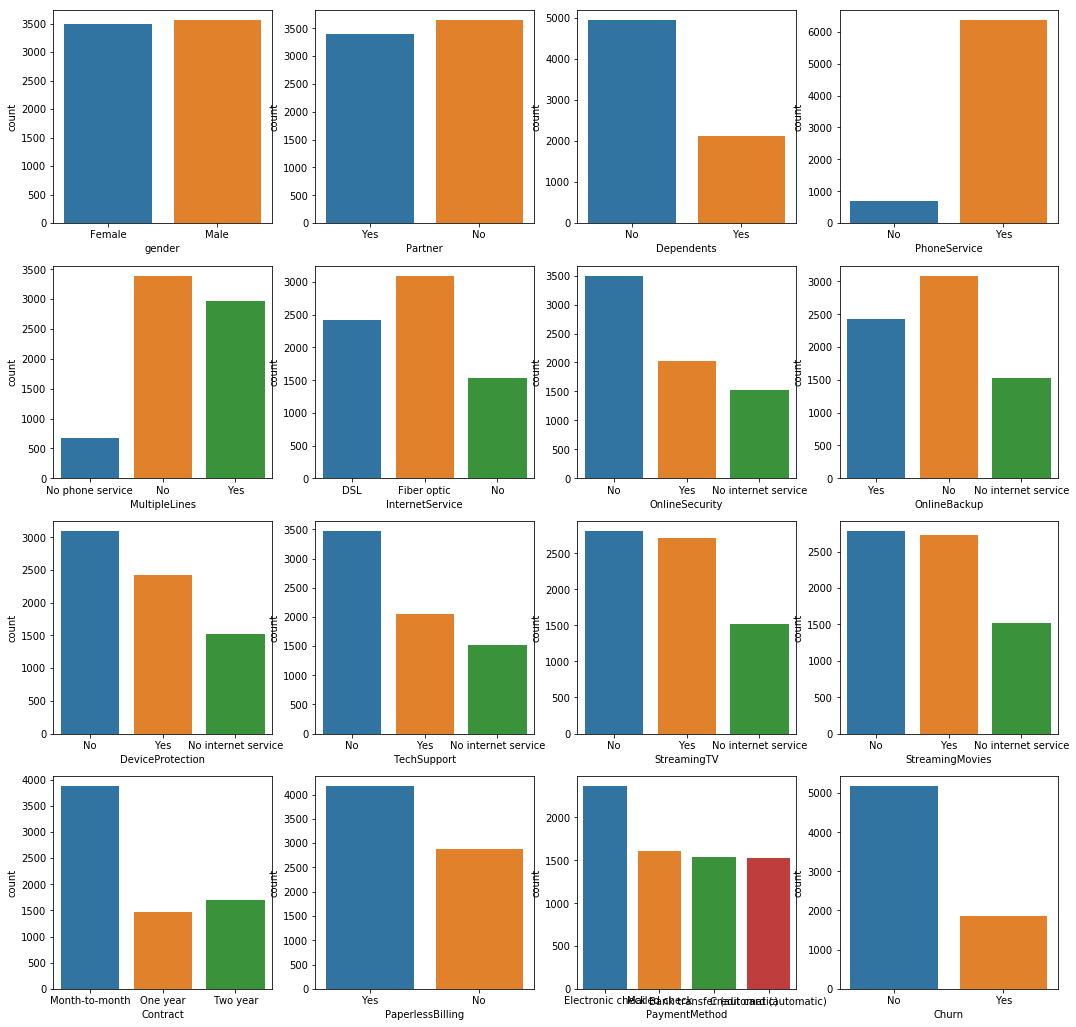

In [417]:
plt.figure(figsize=(18,18))
for k in range(1,len(categorical_features.columns)):
    plt.subplot(4,4,k)
    sns.countplot(x=categorical_features.columns[k],data=data)

Bivariate analysis

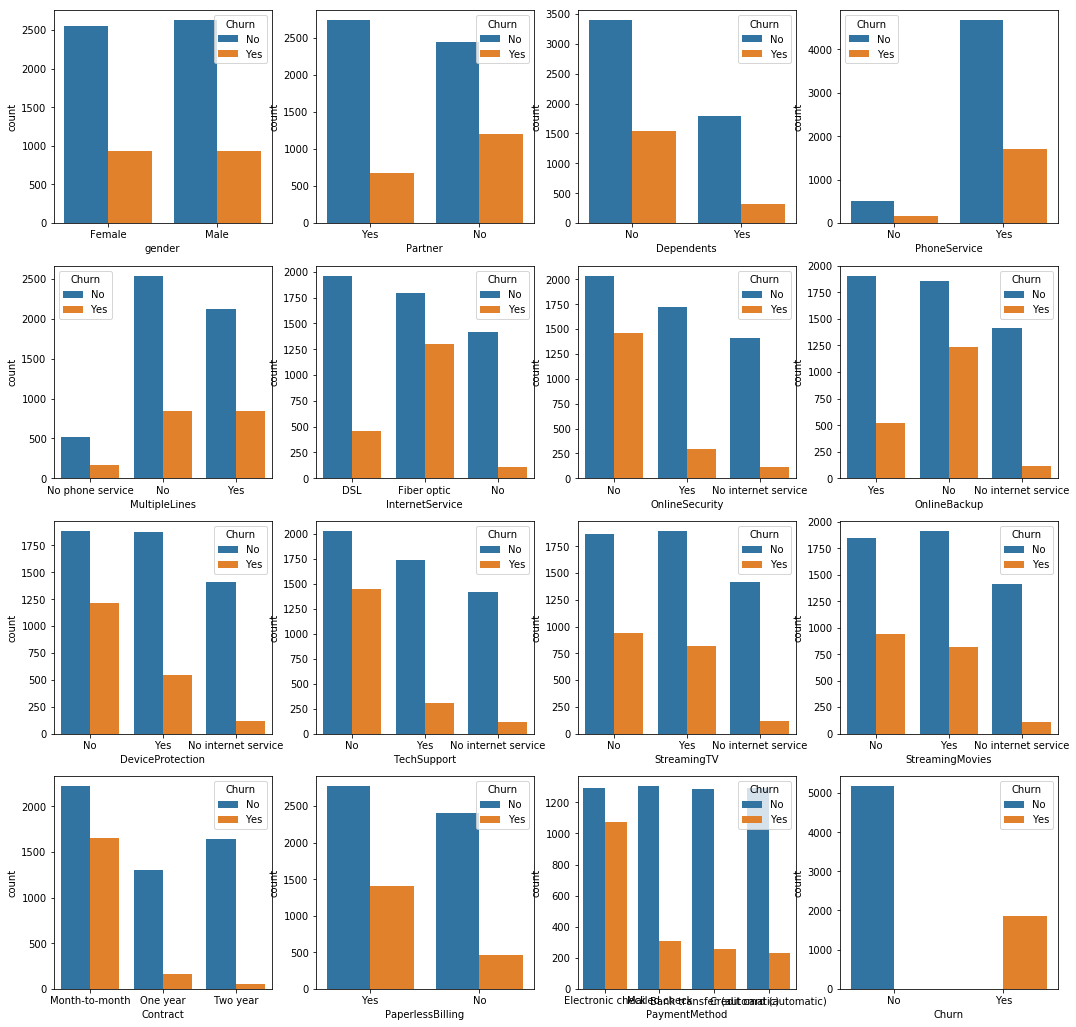

In [418]:
plt.figure(figsize=(18,18))
for k in range(1,len(categorical_features.columns)):
    plt.subplot(4,4,k)
    sns.countplot(x=categorical_features.columns[k],data=data,hue='Churn')

In [419]:
numeric_features.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

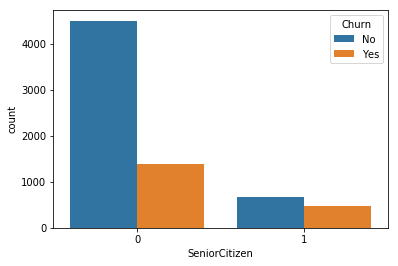

In [420]:
sns.countplot(x='SeniorCitizen',data=data,hue='Churn')

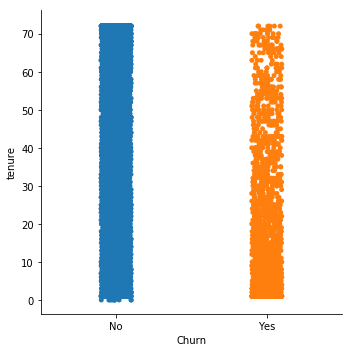

In [421]:
sns.catplot(x='Churn',y='tenure',data=data)

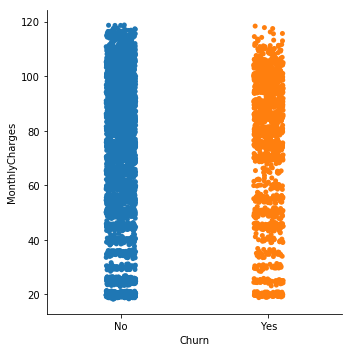

In [422]:
sns.catplot(x='Churn',y='MonthlyCharges',data=data)

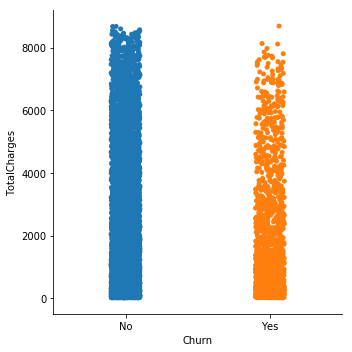

In [423]:
sns.catplot(x='Churn',y='TotalCharges',data=data)

Distribution of observations within categories

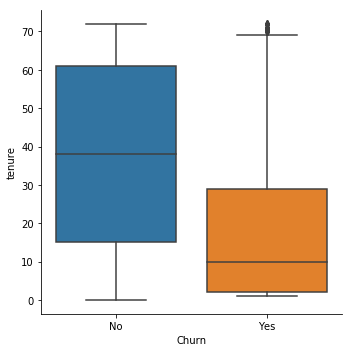

In [424]:
sns.catplot(x='Churn',y='tenure',kind='box',data=data)

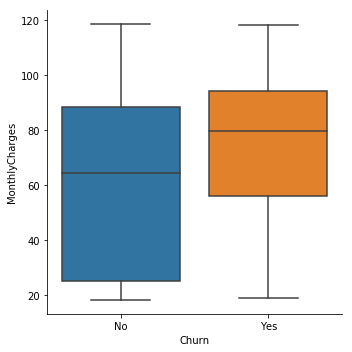

In [425]:
sns.catplot(x='Churn',y='MonthlyCharges',kind='box',data=data)

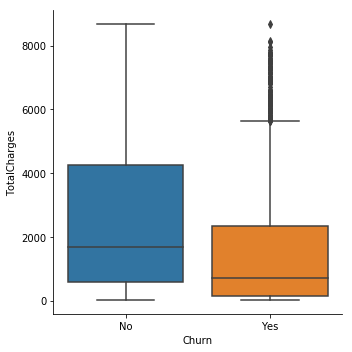

In [426]:
sns.catplot(x='Churn',y='TotalCharges',kind='box',data=data)

# Model quality metrics

Binary classification problem with imbalanced classes. So, instead of using accuracy, we'll use AUC score, because it's easy to achieve a good accuracy by predicting only 'No'

AUC score is the Area Under ROC curve, a score close to 1 means that we have a good model. The curve is drawn by computing true positive rate against false positive rate for various tresholds <br>
<img src="AUC.png">

# Model selection

It's a binary classification problem, we can try different models for this task :<br>
<ul>
    <li>Logistic regression
    <li>Decision tree classifier
    <li>Support vector machines   
</ul>

# Data preprocessing

In [427]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

In [428]:
missing_index=np.array(data.isnull()).nonzero()[0]

In [429]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [430]:
#target
y=data.Churn
X=data.drop(columns=['Churn','customerID'])
y=y.drop(index=missing_index)

In [431]:
#label encoding for gender feature
X['gender']=X['gender'].map({'Male':1, 'Female':0})

In [432]:
#label encoding for other binary features
binary_variables=['Partner','Dependents','PhoneService','PaperlessBilling']

In [433]:
X[binary_variables]=X[binary_variables].replace({'Yes':1, 'No':0})

In [434]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65


In [435]:
#we scale numeric features because they have different magnitudes which can impact the performance of our model
X['tenure']=(X['tenure']-X['tenure'].mean())/X['tenure'].std()
X['MonthlyCharges']=(X['MonthlyCharges']-X['MonthlyCharges'].mean())/X['MonthlyCharges'].std()
X['TotalCharges']=(X['TotalCharges']-X['TotalCharges'].mean())/X['TotalCharges'].std()

In [436]:
#categorical features with more than 2 options
other_variables=['MultipleLines','InternetService','OnlineSecurity',
                 'OnlineBackup','DeviceProtection','TechSupport',
                 'StreamingTV','StreamingMovies','Contract','PaymentMethod']

In [437]:
onehot_encoded=pd.get_dummies(X[other_variables])

In [438]:
onehot_encoded.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [439]:
#features to scale to address the problem of features that are on different magnitudes
numeric=['tenure','MonthlyCharges','TotalCharges']

In [440]:
X=X.drop(columns=other_variables)

In [441]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.277354,0,1,-1.160241,-0.994123
1,1,0,0,0,0.066323,1,0,-0.259611,-0.173727
2,1,0,0,0,-1.236636,1,1,-0.362635,-0.959581
3,1,0,0,0,0.514215,0,0,-0.746482,-0.195234
4,0,0,0,0,-1.236636,1,1,0.197351,-0.940391


In [442]:
X=pd.concat([X,onehot_encoded],axis=1)

In [443]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277354,0,1,-1.160241,-0.994123,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.066323,1,0,-0.259611,-0.173727,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,-1.236636,1,1,-0.362635,-0.959581,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.514215,0,0,-0.746482,-0.195234,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,-1.236636,1,1,0.197351,-0.940391,1,...,1,0,0,1,0,0,0,0,1,0


In [444]:
#11 missing values
X=X.dropna()

In [445]:
#label encoding for target feature
y=y.map({'Yes':1, 'No':0})

In [446]:
l=len(X)
split=int(l*0.7)

In [447]:
#We split the dataset into train set and test set
X_train, X_test=X[:split], X[split:]
y_train, y_test=y[:split], y[split:]

In [448]:
X_train, X_test=np.array(X_train), np.array(X_test)
y_train, y_test=np.array(y_train), np.array(y_test)

In [ ]:
#a little vizualisation before training models
#we do dimensionality reduction here



In [449]:
#First training
logit = LogisticRegression(random_state=75,solver='liblinear')

In [450]:
%%time
logit.fit(X_train,y_train)

Wall time: 84.8 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=75, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [451]:
y_pred=logit.predict_proba(X_test)

In [452]:
y_pred

array([[0.59660287, 0.40339713],
       [0.34419802, 0.65580198],
       [0.85865756, 0.14134244],
       ...,
       [0.57263348, 0.42736652],
       [0.30318555, 0.69681445],
       [0.96341834, 0.03658166]])

In [460]:
logit_score=roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
score

0.8389119900833897

0.8389119900833897